In [142]:

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
from wordcloud import WordCloud
import string
import re
import unicodedata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodedata
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering
from textwrap import wrap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score,recall_score,f1_score, precision_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import spacy
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX

### DATAFRAME 1 FOR VIDEO GAMES :

In [2]:
df1 = pd.read_json('/Users/maitrinarang/Downloads/amazon project/Video_Games_5.json', orient ='columns', lines= True)
df1.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4,Good rally game,1372550400,"06 30, 2013"


In [3]:
df1.shape

(231780, 9)

In [4]:
df1.dtypes

reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
overall            int64
summary           object
unixReviewTime     int64
reviewTime        object
dtype: object

### METADATA FOR VIDEO GAMES :

In [5]:
meta1 = pd.read_json('/Users/maitrinarang/Downloads/amazon project/meta_Video_Games.json', orient ='columns', lines= True)
meta1.head(2)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Video Games, PC, Games]",,[],,Reversi Sensory Challenger,[],,Fidelity Electronics,[],"[>#2,623,937 in Toys &amp; Games (See Top 100 ...",[],Toys &amp; Games,,,,0042000742,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Video Games, Xbox 360, Games, </span></span><...",,[Brand new sealed!],,Medal of Honor: Warfighter - Includes Battlefi...,[B00PADROYW],,by\n \n EA Games,[],"[>#67,231 in Video Games (See Top 100 in Video...","[B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ7...",Video Games,,,"\n\t\t\t\t\t\t\t\t\t\t\t\t<span class=""vertica...",0078764343,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [6]:
meta1.shape

(84819, 19)

In [7]:
meta1.dtypes

category           object
tech1              object
description        object
fit                object
title              object
also_buy           object
tech2              object
brand              object
feature            object
rank               object
also_view          object
main_cat           object
similar_item       object
date               object
price              object
asin               object
imageURL           object
imageURLHighRes    object
details            object
dtype: object

In [8]:
# Using apply() method to combine two columns of text

#here summary is the headline of review and review text is the text 

df1["review"] = df1[["reviewText", "summary"]].apply(" ".join, axis=1)
df1.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,review
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012",Installing the game was a struggle (because of...
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4,Good rally game,1372550400,"06 30, 2013",If you like rally cars get this game you will ...


In [9]:
# spliting the helpful column into help numerator and help denominator
df1['help_nume'] = df1['helpful'].str.get(0)
df1['help_deno'] = df1['helpful'].str.get(1)

# calculating the helpful ratio of the reviews
df1['helpful_ratio'] = df1['help_nume'].div(df1['help_deno'])
df1['helpful_ratio'] = df1['helpful_ratio'].replace(np.nan, 0)

#Bin labels must be one fewer than the number of bin edges
# creating bins for help ratio
bins = [0.0, 0.25, 0.50, 0.75, 1.0]
slot = ['not_helpful',
        'less_helpful',
        'more_helpful',
        'most_helpful']
df1['help_cat'] = pd.cut(df1['helpful_ratio'],bins,labels=slot)

df1.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,review,help_nume,help_deno,helpful_ratio,help_cat
231775,A1ICREREXO9J81,B00KHECZXO,Frustrated gamer,"[0, 1]",Funny people on here are rating sellers that a...,5,this is for rating the system not the seller,1405814400,"07 20, 2014",Funny people on here are rating sellers that a...,0,1,0.000000,NaN
231776,A3VVMIMMTYQV5F,B00KHECZXO,Johnny Saigon,"[8, 11]",All this is is the Deluxe 32GB Wii U with Mari...,1,Get the Other Bundle Which Includes Extra Whee...,1403308800,"06 21, 2014",All this is is the Deluxe 32GB Wii U with Mari...,8,11,0.727273,more_helpful
231777,A1DD4B97M4DUC5,B00KHECZXO,migit,"[62, 66]",The package should have more red on it and sho...,1,Fake bundle,1401321600,"05 29, 2014",The package should have more red on it and sho...,62,66,0.939394,most_helpful
231778,A2Q9CNJ4T6ZK99,B00KHECZXO,"Philip Brown ""Philip & Chana""","[33, 36]",Can get this at Newegg for $329.00 and the pac...,1,Looks Like We Have Gougers Again.,1401667200,"06 2, 2014",Can get this at Newegg for $329.00 and the pac...,33,36,0.916667,most_helpful
231779,A27CD59R5U58GG,B00KHECZXO,ThommyGunn,"[23, 28]","This is not real, you can go to ANY retail sto...",1,DO NOT BUY HERE LOOKS TO BE EUROPEAN VERSION,1401840000,"06 4, 2014","This is not real, you can go to ANY retail sto...",23,28,0.821429,most_helpful


### converting review time from object to date and time and extracting YEAR from the same

In [10]:
df1['reviewTime'] = pd.to_datetime(df1['reviewTime'])
df1['year'] = pd.DatetimeIndex(df1['reviewTime']).year

In [11]:
df1.isnull().sum()

reviewerID             0
asin                   0
reviewerName        2813
helpful                0
reviewText             0
overall                0
summary                0
unixReviewTime         0
reviewTime             0
review                 0
help_nume              0
help_deno              0
helpful_ratio          0
help_cat          113999
year                   0
dtype: int64

In [12]:
df1["reviewerName"].fillna("Unknown", inplace = True)

In [13]:
#df1["help_cat"].fillna("none", inplace = True)

In [14]:
def cleaning(text):
    text= re.sub("[^0-9A-Za-z\-]+", " ", text) 
    #remove special character 
    text= re.sub("(?<!\w)\d+" , " ", text) 
    #if number is written after a word remove it
    text= re.sub("-(?!\w)|(?<!\w)-", "", text)
    #remove hypen except within two words
    text=" ".join(text.split())
    text=text.lower()
    
    return text

In [15]:
df1.review.apply(cleaning)

0         installing the game was a struggle because of ...
1         if you like rally cars get this game you will ...
2         st shipment received a book instead of the gam...
3         i got this version instead of the ps3 version ...
4         i had dirt on xbox and it was an okay game i s...
                                ...                        
231775    funny people on here are rating sellers that a...
231776    all this is is the deluxe gb wii u with mario ...
231777    the package should have more red on it and sho...
231778    can get this at newegg for and the packaging h...
231779    this is not real you can go to any retail stor...
Name: review, Length: 231780, dtype: object

### Statistics of non-numeric variables

In [16]:
# Statistics of non-numeric variables

# Number of unique customers
print('\n Number of unique customers : {}'.format(len(df1['reviewerID'].unique())))
      
# Number of unique products
print('\n Number of unique products : {}'.format(len(df1['asin'].unique())))
      
# Review number per unique customer
print('\n Review per customer: {}'.format((len(df1)/len(df1['reviewerID'].unique()))))      

# Review number per unique product 
print('\n Review per product: {}'.format((len(df1)/len(df1['asin'].unique()))))


 Number of unique customers : 24303

 Number of unique products : 10672

 Review per customer: 9.537094185902975

 Review per product: 21.718515742128936


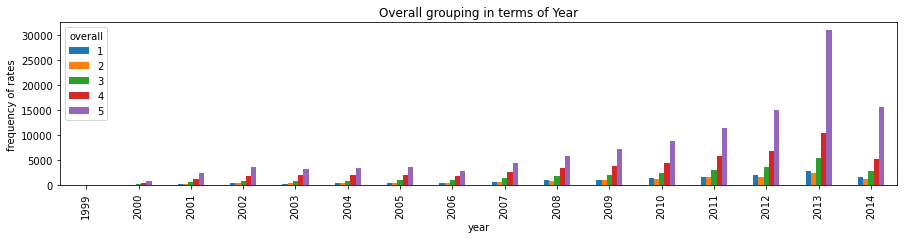

In [17]:
def rate(df):
    year_rate = pd.crosstab(df.year, df.overall, rownames = ['year'], colnames = ['overall'])
    #print(year_rate)
    year_rate.plot(kind = 'bar', figsize= (15, 3))
    plt.ylabel('frequency of rates')
    plt.title ('Overall grouping in terms of Year');
    
rate(df1)

### ADDING SENTIMENTS TO ALL REVIEWS: 

In [18]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
def sentiments(df):
    df['Polarity'] = df['review'].apply(get_polarity)
    df['Sentiment_Type']=''
    df.loc[df.Polarity>0,'Sentiment_Type']='POSITIVE'
    df.loc[df.Polarity==0,'Sentiment_Type']='NEUTRAL'
    df.loc[df.Polarity<0,'Sentiment_Type']='NEGATIVE'
    df.head(3)

In [19]:
sentiments(df1)
df1.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,review,help_nume,help_deno,helpful_ratio,help_cat,year,Polarity,Sentiment_Type
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1,Pay to unlock content? I don't think so.,1341792000,2012-07-09,Installing the game was a struggle (because of...,8,12,0.666667,more_helpful,2012,-0.000189,NEGATIVE
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4,Good rally game,1372550400,2013-06-30,If you like rally cars get this game you will ...,0,0,0.000000,NaN,2013,0.210000,POSITIVE


### ANALYSIS OF OVERALL SENTIMENT DISTRIBUTION OF DATA :

In [20]:
def majority(df):
    sentiment = df['Sentiment_Type'].value_counts()
    print(sentiment)

    pos = sentiment[0]
    neg = sentiment[1]
    neu = sentiment[2]

    def sentiment_score(ptv, ntv, ntrl):
        if (ptv > ntv) and (ptv > ntrl):
            print("MAX sentiments are Positive 😊 ")
        elif (ntv > ptv) and (ntv > ntrl):
            print("max sentiment are Negative 😠 ")
        else:
            print("max sentiment are Neutral 😐 ")
    sentiment_score(pos, neg, neu)

    df.Sentiment_Type.value_counts().plot(kind='bar', ylabel = 'frequency of sentiments', title="Sentiment Analysis");

POSITIVE    187490
NEGATIVE     42740
NEUTRAL       1550
Name: Sentiment_Type, dtype: int64
max sentiment are Positive 😊 


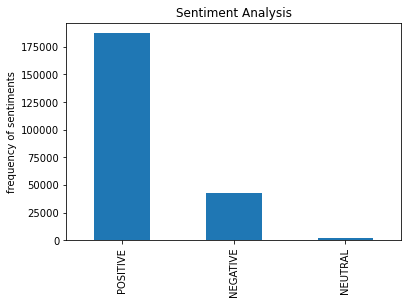

In [21]:
majority(df1)

### MERGING DATAFRAMES :

In [22]:
df_v = pd.merge(df1, meta1, on="asin", how="inner")
df_v.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,review,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1,Pay to unlock content? I don't think so.,1341792000,2012-07-09,Installing the game was a struggle (because of...,...,"[DiRT 3 delivers mud, sweat and gears the worl...","[>#50,093 in Video Games (See Top 100 in Video...",[],Video Games,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4,Good rally game,1372550400,2013-06-30,If you like rally cars get this game you will ...,...,"[DiRT 3 delivers mud, sweat and gears the worl...","[>#50,093 in Video Games (See Top 100 in Video...",[],Video Games,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [23]:
df_v['title'].value_counts()


PlayStation 4 500GB Console [Old Model][Discontinued]    802
Halo - Xbox                                              712
Final Fantasy X                                          658
PlayStation 3 Dualshock 3 Wireless Controller (Black)    652
Grand Theft Auto Vice City                               548
                                                        ... 
Wii Fit Travel Bag                                         5
Superman Returns - Xbox                                    5
Universal Foam Yoga Mat for Wii Fit                        5
Thrustmaster VG S.P.F. Case for PlayStation Vita           5
The Bigs - Playstation 3                                   5
Name: title, Length: 8430, dtype: int64

In [85]:
dfV = df_v[['asin', 'title', 'overall', 'review','help_cat','helpful_ratio','Sentiment_Type', 'main_cat', 'category']]
dfV.head(2)

,asin,title,overall,review,help_cat,helpful_ratio,Sentiment_Type,main_cat,category
0,0700099867,Dirt 3,1,Installing the game was a struggle (because of...,more_helpful,0.666667,NEGATIVE,Video Games,"[Video Games, PC, Games]"
1,0700099867,Dirt 3,4,If you like rally cars get this game you will ...,NaN,0.000000,POSITIVE,Video Games,"[Video Games, PC, Games]"


## TOP10 POSITIVE SENTIMENT PRODUCTS :

In [25]:
positive_df1 = dfV[(dfV.Sentiment_Type == 'POSITIVE')]
positive1 = positive_df1[('Sentiment_Type')].groupby(positive_df1['main_cat']).value_counts()
pos_sent1 = pd.DataFrame({'count':((positive1.sort_values(ascending = False)).head(10))}).reset_index()
pos_sent1

,main_cat,Sentiment_Type,count
0,Video Games,POSITIVE,180586
1,All Electronics,POSITIVE,1475
2,Computers,POSITIVE,1410
3,Software,POSITIVE,401
4,Sports & Outdoors,POSITIVE,81
5,Books,POSITIVE,77
6,Toys & Games,POSITIVE,67
7,Home Audio & Theater,POSITIVE,41
8,Home Audio &amp; Theater,POSITIVE,22
9,Toys &amp; Games,POSITIVE,20


## REASON OF POSITIVE RESPONSE AND WHAT TO MARKET MORE :

In [26]:
# Function for generating word clouds
cv=CountVectorizer(analyzer='word')
def review_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(5 ,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()
#df_dtm=df_dtm.transpose()

In [27]:
pos_df1 = dfV[(dfV.Sentiment_Type == 'POSITIVE')]
pos1 = pos_df1[('Sentiment_Type')].groupby(positive_df1['asin']).value_counts()
pos_1 = pd.DataFrame({'count':((pos1.sort_values(ascending = False)).head(10))}).reset_index()
#pos_1
g = pos_1.asin
pos_df1 = pd.merge(df1, g,on='asin')
pos_df1 = pos_df1[(pos_df1.Sentiment_Type == 'POSITIVE')]
#pos_df1.head(3)

# Loading model
nlp = spacy.load('en_core_web_sm',disable = ['parser', 'ner'])

# Lemmatization with stopwords removal
pos_df1['review'] = pos_df1['review'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]))

df_grouped1 = pos_df1[['asin','review']].groupby(by='asin').agg(lambda x:' '.join(x))
df_grouped1

,review
asin,
B00000JRSB,"think able game price see list , find steal br..."
B00005NZ1G,game far well goldeneye goldeneye great it`s t...
B00005Q8M0,game big improvement N64 smash bros . find c...
B00005TNI6,"say "" be break , don't fix . ""So Square soft ""..."
B000066TS5,patient gamer game . stay away . game conf...
B0000696CZ,"Grand Theft Auto . Robbery , violence , stor..."
B00008J7NZ,"thrill sequel favorite game year , little diss..."
B0009VXBAQ,buy wii kid like invite people throw party pla...
B0015AARJI,great investment please COLOR well STANDARD BL...


In [28]:
cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(df_grouped1['review'])
df_dtm1 = pd.DataFrame(data.toarray(), columns = cv.get_feature_names())
df_dtm1.index = df_grouped1.index
df_dtm1 = df_dtm1.transpose()
df_dtm1.head(3)

asin,B00000JRSB,B00005NZ1G,B00005Q8M0,B00005TNI6,B000066TS5,B0000696CZ,B00008J7NZ,B0009VXBAQ,B0015AARJI,B00BGA9WK2
00,1,0,6,0,0,0,3,11,5,14
000,6,0,1,9,0,3,5,2,1,13
000x,0,0,0,0,0,1,0,0,0,0


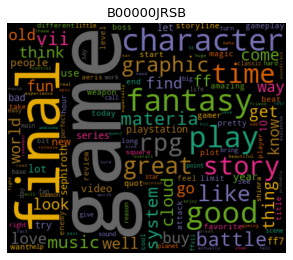

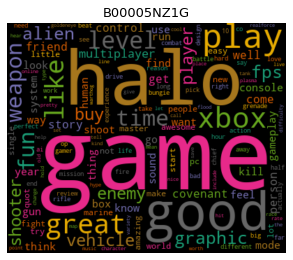

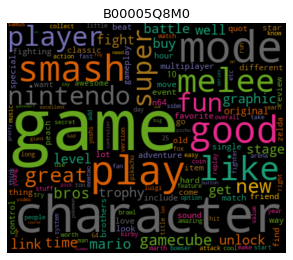

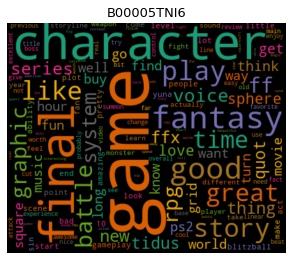

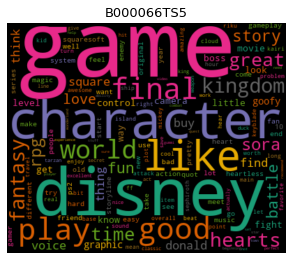

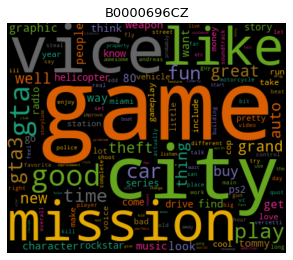

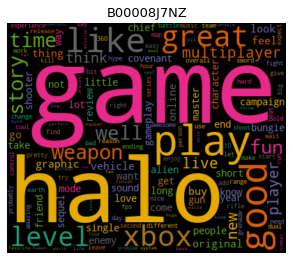

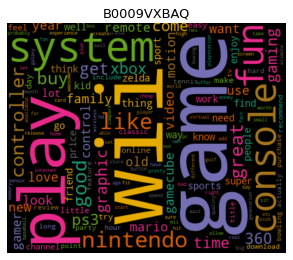

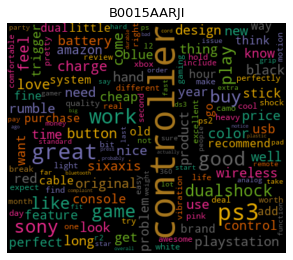

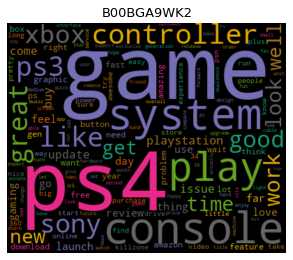

In [29]:
# Plotting word cloud for each product
for index,product in enumerate(df_dtm1.columns):
    review_wordcloud(df_dtm1[product].sort_values(ascending=False),product)

In [30]:
# Declare a list that is to be converted into a column
reasons = ['good_final_game_battle_fantasy_character',
           'good_xbox_game',
           'good_game_smash_mode',
           'great_story_good_graphics',
           'good_disney_character_game',
           'good_vice_city_mission_game',
           'good_xbox_game_halo_weapon',
           'wii_system_fun_game_console',
           'great_controller',
           'ps4_game_console_controller']

# Using 'album_name' as the column name and equating it to the list
df_grouped1['reason of liking'] = reasons
df_grouped1

,review,reason of liking
asin,,
B00000JRSB,"think able game price see list , find steal br...",good_final_game_battle_fantasy_character
B00005NZ1G,game far well goldeneye goldeneye great it`s t...,good_xbox_game
B00005Q8M0,game big improvement N64 smash bros . find c...,good_game_smash_mode
B00005TNI6,"say "" be break , don't fix . ""So Square soft ""...",great_story_good_graphics
B000066TS5,patient gamer game . stay away . game conf...,good_disney_character_game
B0000696CZ,"Grand Theft Auto . Robbery , violence , stor...",good_vice_city_mission_game
B00008J7NZ,"thrill sequel favorite game year , little diss...",good_xbox_game_halo_weapon
B0009VXBAQ,buy wii kid like invite people throw party pla...,wii_system_fun_game_console
B0015AARJI,great investment please COLOR well STANDARD BL...,great_controller


In [98]:
# Declare a list that is to be converted into a column
title = ['Final Fantasy VII',
           'Halo - Xbox',
           'Super Smash Bros Melee',
           'Final Fantasy X',
           'Kingdom Hearts',
           'Grand Theft Auto Vice City',
           'Halo 2 - Xbox',
           'Wii',
           'PlayStation 3 Dualshock 3 Wireless Controller',
           'PlayStation 4 500GB Console [Old Model][Discontinued]']

# Using 'album_name' as the column name and equating it to the list
df_grouped1['product title'] = title
df_grouped1

,review,reason of liking,product title
asin,,,
B00000JRSB,"think able game price see list , find steal br...",good_final_game_battle_fantasy_character,Final Fantasy VII
B00005NZ1G,game far well goldeneye goldeneye great it`s t...,good_xbox_game,Halo - Xbox
B00005Q8M0,game big improvement N64 smash bros . find c...,good_game_smash_mode,Super Smash Bros Melee
B00005TNI6,"say "" be break , don't fix . ""So Square soft ""...",great_story_good_graphics,Final Fantasy X
B000066TS5,patient gamer game . stay away . game conf...,good_disney_character_game,Kingdom Hearts
B0000696CZ,"Grand Theft Auto . Robbery , violence , stor...",good_vice_city_mission_game,Grand Theft Auto Vice City
B00008J7NZ,"thrill sequel favorite game year , little diss...",good_xbox_game_halo_weapon,Halo 2 - Xbox
B0009VXBAQ,buy wii kid like invite people throw party pla...,wii_system_fun_game_console,Wii
B0015AARJI,great investment please COLOR well STANDARD BL...,great_controller,PlayStation 3 Dualshock 3 Wireless Controller


## TOP10 NEGATIVE SENTIMENT PRODUCTS :

In [31]:
neg_df1 = dfV[(dfV.Sentiment_Type == 'NEGATIVE')]
neg1 = neg_df1[('Sentiment_Type')].groupby(neg_df1['asin']).value_counts()
neg_1 = pd.DataFrame({'count':((neg1.sort_values(ascending = False)).head(10))}).reset_index()
neg_1

,asin,Sentiment_Type,count
0,B00178630A,NEGATIVE,157
1,B000FKBCX4,NEGATIVE,127
2,B00005O0I2,NEGATIVE,126
3,B00005NZ1G,NEGATIVE,108
4,B007FTE2VW,NEGATIVE,107
5,B007XVTR3K,NEGATIVE,101
6,B0002A6CQ4,NEGATIVE,100
7,B0000696CZ,NEGATIVE,96
8,B00503E8S2,NEGATIVE,96
9,B0050SXLQC,NEGATIVE,96


In [32]:
a = neg_1.asin
neg_df1 = pd.merge(df1, a,on='asin')
neg_df1.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,review,help_nume,help_deno,helpful_ratio,help_cat,year,Polarity,Sentiment_Type
0,A2FX6SUL8KJVLH,B00005NZ1G,A 12-year old gamer,"[0, 1]",this game is by far better then goldeneye i ow...,5,the best game since goldeneye!!!!!,1006646400,2001-11-25,this game is by far better then goldeneye i ow...,0,1,0.000000,NaN,2001,0.226042,POSITIVE
1,A103JSUL9TCTGV,B00005NZ1G,A 9-year old gamer,"[0, 0]",This is nominated for Chris's Xbox Game of the...,5,Chris's Game Reviews 3 Halo: The Game of all X...,1012521600,2002-02-01,This is nominated for Chris's Xbox Game of the...,0,0,0.000000,NaN,2002,-0.157143,NEGATIVE
2,AR9QPZFX65LDV,B00005NZ1G,Aaron Alexander,"[2, 3]",Halo is the game that set a standard for all o...,5,Nearly flawless,1143072000,2006-03-23,Halo is the game that set a standard for all o...,2,3,0.666667,more_helpful,2006,0.115763,POSITIVE


In [33]:
# Loading model
nlp = spacy.load('en_core_web_sm',disable = ['parser', 'ner'])

# Lemmatization with stopwords removal
neg_df1['review'] = neg_df1['review'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]))

In [111]:
df_grouped3 = neg_df1[['asin','review']].groupby(by='asin').agg(lambda x:' '.join(x))
df_grouped3.head()

,review
asin,
B00005NZ1G,game far well goldeneye goldeneye great it`s t...
B00005O0I2,review game long probabally hear great million...
B0000696CZ,"wow ! game ! think game like possible gta3 , t..."
B0002A6CQ4,game unparallel ability amazing . good game .....
B000FKBCX4,worried DRM issue prior release . like fact li...


In [35]:
cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(df_grouped3['review'])
df_dtm2 = pd.DataFrame(data.toarray(), columns = cv.get_feature_names())
df_dtm2.index = df_grouped3.index
df_dtm2 = df_dtm2.transpose()
df_dtm2.head(3)

asin,B00005NZ1G,B00005O0I2,B0000696CZ,B0002A6CQ4,B000FKBCX4,B00178630A,B00503E8S2,B0050SXLQC,B007FTE2VW,B007XVTR3K
00,0,2,0,3,1,2,2,7,3,4
000,0,1,3,11,1,33,2,0,12,5
0000000000000000001,0,0,0,0,0,0,1,0,0,0


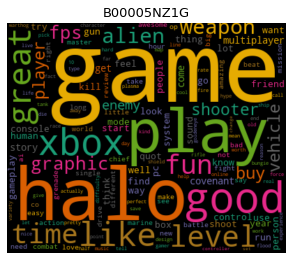

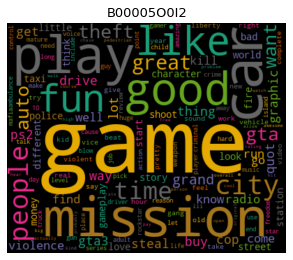

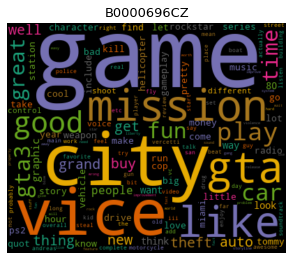

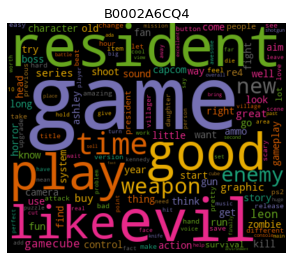

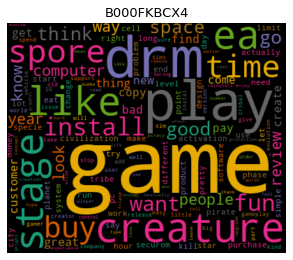

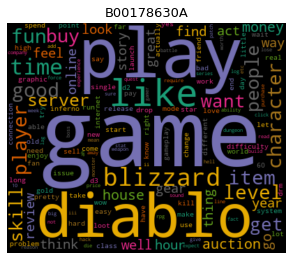

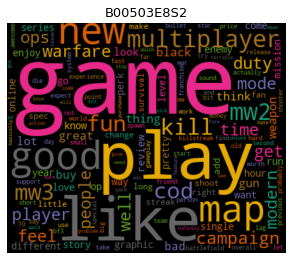

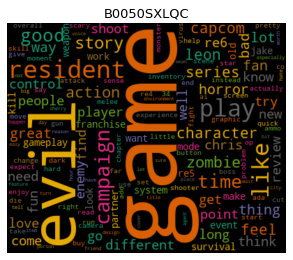

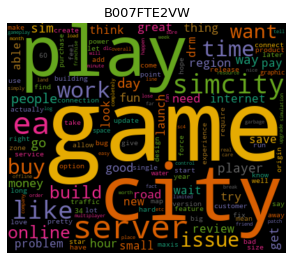

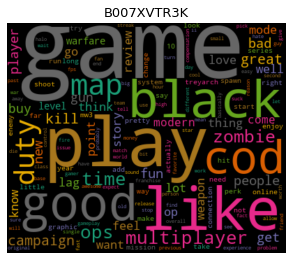

In [36]:
# Plotting word cloud for each product
for index,product in enumerate(df_dtm2.columns):
    review_wordcloud(df_dtm2[product].sort_values(ascending=False),product)

In [37]:
# Declare a list that is to be converted into a column
reasons = ['spend_hour_install_drm_bad_time',
           'bad_weapon_control',
           'system_issue_long_level_server_hour',
           'bad_ending_system_problem_time',
           'hard_mission_player_run_time',
           'bad_control_system_time',
           'bad_graphic',
           'bad_server_issue_online_hour_',
           'server_issue_time_connection',
           'change_ops_bad_online_time']

# Using 'album_name' as the column name and equating it to the list
df_grouped3['reason of disliking'] = reasons
df_grouped3

,review,reason of disliking
asin,,
B00005NZ1G,game far well goldeneye goldeneye great it`s t...,spend_hour_install_drm_bad_time
B00005O0I2,review game long probabally hear great million...,bad_weapon_control
B0000696CZ,"wow ! game ! think game like possible gta3 , t...",system_issue_long_level_server_hour
B0002A6CQ4,game unparallel ability amazing . good game .....,bad_ending_system_problem_time
B000FKBCX4,worried DRM issue prior release . like fact li...,hard_mission_player_run_time
B00178630A,"far , pretty happy title Diablo series . mixed...",bad_control_system_time
B00503E8S2,game good Modern Warfare fanchise ! like story...,bad_graphic
B0050SXLQC,play beat Leon Campaign Solo online Coop norma...,bad_server_issue_online_hour_
B007FTE2VW,EA threaten ban user demand refund incomplete ...,server_issue_time_connection


In [109]:
# Declare a list that is to be converted into a column
title = ['Halo - Xbox',
           'Grand Theft Auto III',
           'Grand Theft Auto Vice City',
           'Resident Evil 4 - Gamecube',
           'Spore - PC/Mac',
           'Diablo II',
           'Call of Duty: Modern Warfare 3 - Xbox 360',
           'Resident Evil 6 - Playstation 3',
           'SimCity: Limited Edition',
           'Call of Duty: Black Ops II - Xbox 360']

# Using 'album_name' as the column name and equating it to the list
df_grouped3['product title'] = title
df_grouped3

,review,reason of disliking,product title
asin,,,
B00005NZ1G,game far well goldeneye goldeneye great it`s t...,spend_hour_install_drm_bad_time,Halo - Xbox
B00005O0I2,review game long probabally hear great million...,bad_weapon_control,Grand Theft Auto III
B0000696CZ,"wow ! game ! think game like possible gta3 , t...",system_issue_long_level_server_hour,Grand Theft Auto Vice City
B0002A6CQ4,game unparallel ability amazing . good game .....,bad_ending_system_problem_time,Resident Evil 4 - Gamecube
B000FKBCX4,worried DRM issue prior release . like fact li...,hard_mission_player_run_time,Spore - PC/Mac
B00178630A,"far , pretty happy title Diablo series . mixed...",bad_control_system_time,Diablo II
B00503E8S2,game good Modern Warfare fanchise ! like story...,bad_graphic,Call of Duty: Modern Warfare 3 - Xbox 360
B0050SXLQC,play beat Leon Campaign Solo online Coop norma...,bad_server_issue_online_hour_,Resident Evil 6 - Playstation 3
B007FTE2VW,EA threaten ban user demand refund incomplete ...,server_issue_time_connection,SimCity: Limited Edition


# CLASSIFICATION :

In [38]:
dfv = pd.merge(df1, meta1, on="asin", how="inner")
dfv.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,review,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1,Pay to unlock content? I don't think so.,1341792000,2012-07-09,Installing the game was a struggle (because of...,...,"[DiRT 3 delivers mud, sweat and gears the worl...","[>#50,093 in Video Games (See Top 100 in Video...",[],Video Games,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4,Good rally game,1372550400,2013-06-30,If you like rally cars get this game you will ...,...,"[DiRT 3 delivers mud, sweat and gears the worl...","[>#50,093 in Video Games (See Top 100 in Video...",[],Video Games,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [39]:
def compute_class(df):
    df.loc[(df['Sentiment_Type'] == 'POSITIVE') & (df['overall'] <= 4) ,'Customer_churn'] = 'NO'
    df.loc[(df['Sentiment_Type'] == 'NEGATIVE') & (df['overall'] < 4) ,'Customer_churn'] = 'YES'
    df.loc[((df['Sentiment_Type'] =='NEUTRAL') & (df['overall'] < 4)), 'Customer_churn'] = 'YES'
    df['Customer_churn'].fillna('YES', inplace=True)
    

In [40]:
#def satisfaction(df):
  #  df.loc[(df['Sentiment_Type'] == 'POSITIVE') & (df['overall'] <= 4) ,'Customer_satisfaction'] = 'SATISFIED'
   # df.loc[(df['Sentiment_Type'] == 'NEGATIVE') & (df['overall'] < 4) ,'Customer_satisfaction'] = 'UNSATISFIED'
   # df.loc[((df['Sentiment_Type'] =='NEUTRAL') & (df['overall'] < 4)), 'Customer_satisfaction'] = 'UNSATISFIED'
    #df['Customer_satisfaction'].fillna('UNSATISFIED', inplace=True)

In [41]:
#satisfaction(dfv)

In [112]:
dfv['Customer_churn'].value_counts()

YES    150320
NO      78887
Name: Customer_churn, dtype: int64

In [43]:
compute_class(dfv)


In [44]:
dfv.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,review,...,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details,Customer_churn
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1,Pay to unlock content? I don't think so.,1341792000,2012-07-09,Installing the game was a struggle (because of...,...,"[>#50,093 in Video Games (See Top 100 in Video...",[],Video Games,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,YES
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4,Good rally game,1372550400,2013-06-30,If you like rally cars get this game you will ...,...,"[>#50,093 in Video Games (See Top 100 in Video...",[],Video Games,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NO


In [45]:
dfv.columns


Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime', 'review',
       'help_nume', 'help_deno', 'helpful_ratio', 'help_cat', 'year',
       'Polarity', 'Sentiment_Type', 'category', 'tech1', 'description', 'fit',
       'title', 'also_buy', 'tech2', 'brand', 'feature', 'rank', 'also_view',
       'main_cat', 'similar_item', 'date', 'price', 'imageURL',
       'imageURLHighRes', 'details', 'Customer_churn'],
      dtype='object')

In [46]:
fdf = dfv.loc[:, ["asin","reviewerID", "main_cat","helpful_ratio","review","overall" , "Sentiment_Type", "Customer_churn"]]
fdf.head(1)

,asin,reviewerID,main_cat,helpful_ratio,review,overall,Sentiment_Type,Customer_churn
0,0700099867,A2HD75EMZR8QLN,Video Games,0.666667,Installing the game was a struggle (because of...,1,NEGATIVE,YES


### taking a smaller df for model building

In [47]:
a= fdf[:50000]
a

,asin,reviewerID,main_cat,helpful_ratio,review,overall,Sentiment_Type,Customer_churn
0,0700099867,A2HD75EMZR8QLN,Video Games,0.666667,Installing the game was a struggle (because of...,1,NEGATIVE,YES
1,0700099867,A3UR8NLLY1ZHCX,Video Games,0.000000,If you like rally cars get this game you will ...,4,POSITIVE,NO
2,0700099867,A1INA0F5CWW3J4,Video Games,0.000000,1st shipment received a book instead of the ga...,1,NEGATIVE,YES
3,0700099867,A1DLMTOTHQ4AST,Video Games,0.700000,"I got this version instead of the PS3 version,...",3,POSITIVE,NO
4,0700099867,A361M14PU2GUEG,Video Games,1.000000,I had Dirt 2 on Xbox 360 and it was an okay ga...,4,POSITIVE,NO
...,...,...,...,...,...,...,...,...
49995,B00005YVTZ,A1ZV5N0TCLFF0U,Video Games,1.000000,"I rented this game an couple of weeks ago, and...",1,NEGATIVE,YES
49996,B00005YVTZ,ASQUU3Q95SKS6,Video Games,0.666667,"Unfortunately, I was one of those idiots who b...",2,NEGATIVE,YES
49997,B00005YVTZ,ASQUU3Q95SKS6,Video Games,0.666667,"Unfortunately, I was one of those idiots who b...",2,NEGATIVE,YES
49998,B00005YVTZ,A2KVUYPLEW4LXT,Video Games,0.666667,"What makes for a good shooter? Great graphics,...",3,POSITIVE,NO


In [48]:
encoder_1 = preprocessing.LabelEncoder()

encoder_1.fit(a.Customer_churn)
print(encoder_1.classes_)
a.Customer_churn = encoder_1.transform(a.Customer_churn)

['NO' 'YES']


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [50]:
sX = tfidf_vectorizer.fit_transform(a['review'].values)
sy = a['Customer_churn'].values



In [51]:
a['Customer_churn'].value_counts()


1    34011
0    15989
Name: Customer_churn, dtype: int64

### balancing the classes using SMOTE

In [52]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

sX_train, sX_test, sy_train, sy_test = train_test_split(sX, sy, test_size=0.25, random_state=10)

print("Number transactions X_train dataset: ", sX_train.shape)
print("Number transactions y_train dataset: ", sy_train.shape)
print("Number transactions X_test dataset: ", sX_test.shape)
print("Number transactions y_test dataset: ", sy_test.shape)

Number transactions X_train dataset:  (37500, 66178)
Number transactions y_train dataset:  (37500,)
Number transactions X_test dataset:  (12500, 66178)
Number transactions y_test dataset:  (12500,)


In [53]:
print("Before OverSampling, counts of label '1': {}".format(sum(sy_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(sy_train==0)))

sm = SMOTE()
sX_train_res, sy_train_res = sm.fit_resample(sX_train, sy_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(sX_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(sy_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(sy_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(sy_train_res==0)))

Before OverSampling, counts of label '1': 25533
Before OverSampling, counts of label '0': 11967 

After OverSampling, the shape of train_X: (51066, 66178)
After OverSampling, the shape of train_y: (51066,) 

After OverSampling, counts of label '1': 25533
After OverSampling, counts of label '0': 25533


In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
# required Python libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [55]:
# define lists to gather results for plotting later
results, names = list(), list()

In [56]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
n_scores = cross_val_score(classifier_rf, sX,sy , scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores)
names.append('RF')

print('ACCURACY: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


ACCURACY: 0.680 (0.000)


In [57]:
# define the model
model = DecisionTreeClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
n_scores = cross_val_score(model, sX,sy, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores)
names.append('DT')

# report performance
print('ACCURACY: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

ACCURACY: 0.920 (0.003)


In [58]:
# define the model
model = AdaBoostClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
n_scores = cross_val_score(model, sX, sy, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores)
names.append('ada')

# report performance
print('ACCURACY: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

ACCURACY: 0.731 (0.003)


In [59]:
from sklearn.linear_model import LogisticRegression

# creating a logistic regression classifier
logregs = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(logregs, sX, sy, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
results.append(n_scores)
names.append('LR')

# report performance
print('ACCURACY: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

ACCURACY: 0.791 (0.003)


In [60]:
names

['RF', 'DT', 'ada', 'LR']

In [61]:
results

[array([0.6803, 0.6802, 0.6802, 0.6802, 0.6802, 0.6803, 0.6802, 0.6802,
        0.6802, 0.6802]),
 array([0.9132, 0.9241, 0.9229, 0.9224, 0.9205, 0.921 , 0.9169, 0.9178,
        0.923 , 0.9228]),
 array([0.7307, 0.7369, 0.7246, 0.7271, 0.7297, 0.7332, 0.7323, 0.7336,
        0.7333, 0.7301]),
 array([0.7936, 0.7917, 0.7887, 0.7887, 0.7977, 0.7912, 0.7954, 0.7932,
        0.787 , 0.7908, 0.7857, 0.7911, 0.7937, 0.7872, 0.7912])]

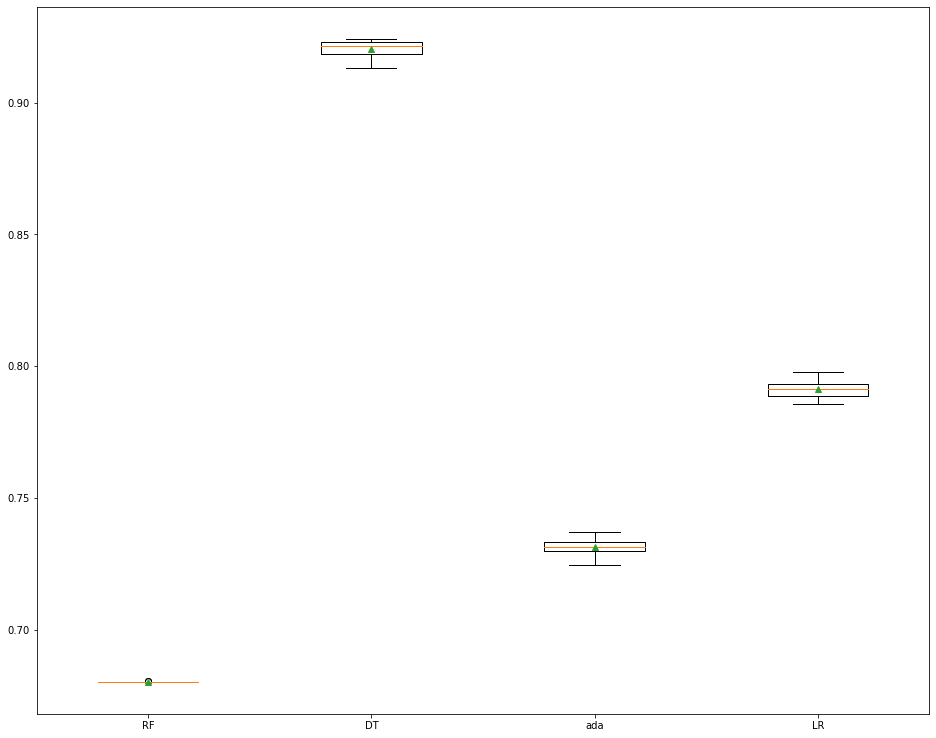

In [62]:
plt.figure(figsize=(16,13))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

# CLUSTERING :  

In [63]:
dfv['price'].value_counts()

\n\t\t                                            \n\r\n\r\n\r\n\r\n\r\n    \r\n    \r\n        \r\n        \n\n\n\n\n\n\n\n\n\n\n\n    \n    \n    \n       \n           <div class="a-section a-spacing-none"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [64]:
dfv['price'] = dfv['price'].replace('\n\t\t                                            \n\r\n\r\n\r\n\r\n\r\n    \r\n    \r\n        \r\n        \n\n\n\n\n\n\n\n\n\n\n\n    \n    \n    \n       \n           <div class="a-section a-spacing-none"', '')



In [65]:
dfv['price'] = dfv['price'].replace('\n\t\t\t\t\t\t\t\t\t\t\t\t<span class="verticalAlign a-size-large"', '')



In [66]:
dfv['price'] = dfv['price'].replace('\n\t\t                                            \n\n\n\n\n\n    \n    \n        \n        \n\n\n\n\n\n\n\n\n\n\n\n    \n    \n    \n       \n           <div class="a-section a-spacing-none"', '')


In [67]:
dfv['price'] = dfv['price'].replace('.a-box-inner{background-color:#fff}#alohaBuyBoxWidget .selected{background-color:#fffbf3;border-color:#e77600;box-shadow:0 0 3px rgba(228,121,17,.5)}#alohaBuyBoxWidget .contract-not-available{color:gray}#aloha-cart-popover .aloha-cart{height:auto;overflow:hidden}#aloha-cart-popover #aloha-cartInfo{float:left}#aloha-cart-popover #aloha-cart-details{float:right;margin-top:1em}#aloha-cart-popover .deviceContainer{width:160px;float:left;padding-right:10px;border-right:1px solid #ddd}#aloha-cart-popover li:last-child{border-right:0}#aloha-cart-popover .aloha-device-title{height:3em;overflow:hidden}#aloha-cart-popover .aloha-thumbnail-container{height:100px;margin-bottom:1em;text-align:center}#aloha-cart-popover .aloha-price-container{text-align:center}#aloha-cart-popover .aloha-thumbnail-container img{height:inherit}#aloha-cart-popover .aloha-cart{border-top:1px solid #ddd;border-bottom:1px solid #ddd}#aloha-cart-popover #aloha-cart-info{margin-right:0}#alohaBuyBoxWidget .without-contract-subheading{margin-right:0}#aloha-bb-help-nodes .aloha-bb-contract-term-heading{color:gray;font-family:arial;margin-top:.5em;text-align:center;height:.7em;border-bottom:1px solid gray;margin-bottom:1.6em}#aloha-bb-help-nodes .aloha-bb-contract-term-heading span{background-color:#fff;padding:0 10px 0 10px}#alohaAvailabilityUS_feature_div .availability a{text-decoration:none}#alohaPricingWidget a{text-decoration:none}#alohaAvailabilityUS_feature_div .availability{margin-top:-4px;margin-bottom:0}#alohaBuyBoxWidget .select-transaction-alert .a-icon-alert{top:18px;left:3px}#alohaBuyBoxWidget .select-transaction-alert .a-alert-container{padding-left:39px;width:290px}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .contract-container .contract-term-heading a{text-decoration:none}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .annual-contract-box .a-icon-popover{display:none}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .contract-container .annual-contract-box{cursor:pointer;cursor:hand}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .aloha-buybox-price{font-size:15px}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget #linkOffSection a{text-decoration:none}#alohaBuyBoxUS_feature_div .lockedUsedBuyboxContainer{padding-left:3.5%}#alohaBuyBoxUS_feature_div .alohaBuyboxUtilsNoWrap{white-space:nowrap}.hidden{display:none}.simo-no-padding{padding:0}.carrier-reviews-cell{padding-left:10px}.carrier-reviews-bordered-cell{border:1px dotted #ccc}.carrier-reviews-selected-cell{background-color:#ffd}#aloha-carrier-compatibility-modal-table-description{margin-top:10px;margin-bottom:14px}.aloha-carrier-compatibility-sortable-header.carrier{min-width:97px}.aloha-carrier-compatibility-sortable-header.compatibility{min-width:156px}.aloha-carrier-compatibility-sortable-header div{float:left}.aloha-carrier-compatibility-sortable-header i.a-icon{margin-left:10px;margin-top:4px}#aloha-carrier-compatibility-overview-table.a-bordered.a-vertical-stripes td:nth-child(2n),#aloha-carrier-compatibility-overview-table.a-bordered.a-vertical-stripes th:nth-child(2n){background-color:initial}#aloha-carrier-compatibility-modal-table.a-bordered.a-vertical-stripes td:nth-child(2n),#aloha-carrier-compatibility-modal-table.a-bordered.a-vertical-stripes th:nth-child(2n){background-color:initial}#aloha-carrier-compatibility-table.a-bordered.a-vertical-stripes th:nth-child(2n),.aloha-carrier-compatibility-table.a-bordered.a-vertical-stripes td:nth-child(2n){background-color:transparent}.aloha-carrier-compatibility-column-gray{background-color:#f6f6f6}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-tech-text,.aloha-carrier-compatibility-modal-table-row .carrier-name,.aloha-carrier-compatibility-modal-table-row .carrier-rating-summary{min-height:27px;display:inline-block;cursor:default}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-tech-text:first-line,.aloha-carrier-compatibility-modal-table-row .carrier-name:first-line,.aloha-carrier-compatibility-modal-table-row .carrier-rating-summary:first-line{line-height:27px}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-icon{margin-top:6px}.aloha-carrier-compatibility-check-icon{width:30px;height:27px;background-position:-318px -35px;background-image:url(https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUIBaseCSS-sprite_2x-8e7ef370dc28a214b3f490c9620f4ac501d5a864._V2_.png);background-repeat:no-repeat;background-size:400px 650px;display:inline-block;vertical-align:top}.aloha-carrier-compatibility-hidden{display:none}.aloha-buybox-spaced-link{margin-top:12px;margin-bottom:7px;text-align:center}.popover-tab', '')



In [68]:
dfv['price'] = dfv['price'].replace({r'\$':''}, regex = True)

In [69]:
dfv['price'] = dfv['price'].replace({'': 60.00}, regex = True)

In [70]:
dfv['price'].fillna(value= 60.00, inplace=True)

In [71]:
dfv['price'].value_counts()

60.0      194498
6.66         510
7.43         487
12.99        481
164.91       472
           ...  
52.90          5
2.44           5
19.21          5
6.50           5
14.98          5
Name: price, Length: 841, dtype: int64

In [72]:
df_recency = dfv.groupby(by='reviewerName',
                        as_index=False)['reviewTime'].max()
df_recency.columns = ['CustomerName', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency

,CustomerName,LastPurchaseDate,Recency
0,,2014-04-16,97
1," ""Top 100 Amazon Reviewer""",2014-05-14,69
2,"! MR. KNOW IT ALL ;-b ""DR SHOCK""",2012-02-23,880
3,"""White_Crow""",2005-07-05,3304
4,"""aaagew""",2001-02-12,4908
...,...,...,...
22272,"~K.I.S.S.E.S.S~don't lie~ ""An artist's hands ...",2014-04-07,106
22273,"~Luv2cruz~ ""LUV2GOCRUIZN""",2014-01-14,189
22274,~Miss~,2013-05-29,419
22275,~M~,2011-10-25,1001


In [73]:
df_recency['LastPurchaseDate']=df_recency['LastPurchaseDate'].astype(np.int64)

In [76]:
frequency_df['CustomerName']=frequency_df['CustomerName'].astype(str)

In [77]:
frequency_df = dfv.groupby(
    by=['reviewerName'], as_index=False)['reviewTime'].count()
frequency_df.columns = ['CustomerName', 'Frequency']
frequency_df.drop_duplicates()

,CustomerName,Frequency
0,,13
1," ""Top 100 Amazon Reviewer""",2
2,"! MR. KNOW IT ALL ;-b ""DR SHOCK""",4
3,"""White_Crow""",18
4,"""aaagew""",9
...,...,...
22272,"~K.I.S.S.E.S.S~don't lie~ ""An artist's hands ...",2
22273,"~Luv2cruz~ ""LUV2GOCRUIZN""",2
22274,~Miss~,16
22275,~M~,8


In [78]:
dfv.price = pd.to_numeric(dfv.price, errors='coerce').fillna(0).astype(np.int64) 

In [79]:
monetary_df = dfv.groupby(by='reviewerName', as_index=False)['price'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']
monetary_df.head()

,CustomerName,Monetary
0,,764
1," ""Top 100 Amazon Reviewer""",120
2,"! MR. KNOW IT ALL ;-b ""DR SHOCK""",240
3,"""White_Crow""",1080
4,"""aaagew""",605


In [80]:
rf_df = df_recency.merge(frequency_df, on='CustomerName')
rfm_df = rf_df.merge(monetary_df, on='CustomerName').drop(
    columns='LastPurchaseDate')
rfm_df

,CustomerName,Recency,Frequency,Monetary
0,,97,13,764
1," ""Top 100 Amazon Reviewer""",69,2,120
2,"! MR. KNOW IT ALL ;-b ""DR SHOCK""",880,4,240
3,"""White_Crow""",3304,18,1080
4,"""aaagew""",4908,9,605
...,...,...,...,...
22272,"~K.I.S.S.E.S.S~don't lie~ ""An artist's hands ...",106,2,120
22273,"~Luv2cruz~ ""LUV2GOCRUIZN""",189,2,120
22274,~Miss~,419,16,911
22275,~M~,1001,8,431


In [81]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,,97,13,764,86.162138,82.353997,82.353997
1," ""Top 100 Amazon Reviewer""",69,2,120,89.609252,3.797639,3.797639
2,"! MR. KNOW IT ALL ;-b ""DR SHOCK""",880,4,240,34.576690,22.370606,22.370606
3,"""White_Crow""",3304,18,1080,7.628565,89.713606,89.713606
4,"""aaagew""",4908,9,605,0.235796,67.913094,67.913094


In [82]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerName', 'RFM_Score']].head(7)

,CustomerName,RFM_Score
0,,4.15
1," ""Top 100 Amazon Reviewer""",0.83
2,"! MR. KNOW IT ALL ;-b ""DR SHOCK""",1.21
3,"""White_Crow""",3.87
4,"""aaagew""",2.89
5,"""acwill007""",3.41
6,"""adancingmonkeynamedbobo""",3.13


In [83]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] >= 3,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 2,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerName', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerName,RFM_Score,Customer_segment
0,,4.15,Top Customers
1," ""Top 100 Amazon Reviewer""",0.83,Lost Customers
2,"! MR. KNOW IT ALL ;-b ""DR SHOCK""",1.21,Lost Customers
3,"""White_Crow""",3.87,High value Customer
4,"""aaagew""",2.89,Medium Value Customer
5,"""acwill007""",3.41,High value Customer
6,"""adancingmonkeynamedbobo""",3.13,High value Customer
7,"""adidas21012""",3.67,High value Customer
8,"""american_psyco12""",3.75,High value Customer
9,"""andrew007_jjj""",4.22,Top Customers


In [113]:
rfm_df['Customer_segment'].value_counts()

Lost Customers           6129
High value Customer      5630
Medium Value Customer    5474
Top Customers            2846
Low Value Customers      2198
Name: Customer_segment, dtype: int64

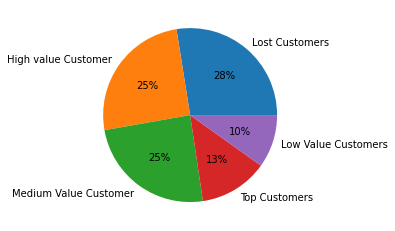

In [84]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

# TIME SERIES: 

In [114]:
df1=pd.read_csv("/Users/maitrinarang/file2.csv", parse_dates=['reviewTime'])
df1.head(1)

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,...,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details,Customer_churn
0,0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1,Pay to unlock content? I don't think so.,1341792000,2012-07-09,...,"['>#50,093 in Video Games (See Top 100 in Vide...",[],Video Games,NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN,YES


In [115]:
df1['price'] = df1['price'].replace('\n\t\t                                            \n\r\n\r\n\r\n\r\n\r\n    \r\n    \r\n        \r\n        \n\n\n\n\n\n\n\n\n\n\n\n    \n    \n    \n       \n           <div class="a-section a-spacing-none"', '')


In [116]:
df1['price'] = df1['price'].replace('\n\t\t\t\t\t\t\t\t\t\t\t\t<span class="verticalAlign a-size-large"', '')





In [117]:
df1['price'] = df1['price'].replace('\n\t\t                                            \n\n\n\n\n\n    \n    \n        \n        \n\n\n\n\n\n\n\n\n\n\n\n    \n    \n    \n       \n           <div class="a-section a-spacing-none"', '')




In [118]:
df1['price'] = df1['price'].replace('.a-box-inner{background-color:#fff}#alohaBuyBoxWidget .selected{background-color:#fffbf3;border-color:#e77600;box-shadow:0 0 3px rgba(228,121,17,.5)}#alohaBuyBoxWidget .contract-not-available{color:gray}#aloha-cart-popover .aloha-cart{height:auto;overflow:hidden}#aloha-cart-popover #aloha-cartInfo{float:left}#aloha-cart-popover #aloha-cart-details{float:right;margin-top:1em}#aloha-cart-popover .deviceContainer{width:160px;float:left;padding-right:10px;border-right:1px solid #ddd}#aloha-cart-popover li:last-child{border-right:0}#aloha-cart-popover .aloha-device-title{height:3em;overflow:hidden}#aloha-cart-popover .aloha-thumbnail-container{height:100px;margin-bottom:1em;text-align:center}#aloha-cart-popover .aloha-price-container{text-align:center}#aloha-cart-popover .aloha-thumbnail-container img{height:inherit}#aloha-cart-popover .aloha-cart{border-top:1px solid #ddd;border-bottom:1px solid #ddd}#aloha-cart-popover #aloha-cart-info{margin-right:0}#alohaBuyBoxWidget .without-contract-subheading{margin-right:0}#aloha-bb-help-nodes .aloha-bb-contract-term-heading{color:gray;font-family:arial;margin-top:.5em;text-align:center;height:.7em;border-bottom:1px solid gray;margin-bottom:1.6em}#aloha-bb-help-nodes .aloha-bb-contract-term-heading span{background-color:#fff;padding:0 10px 0 10px}#alohaAvailabilityUS_feature_div .availability a{text-decoration:none}#alohaPricingWidget a{text-decoration:none}#alohaAvailabilityUS_feature_div .availability{margin-top:-4px;margin-bottom:0}#alohaBuyBoxWidget .select-transaction-alert .a-icon-alert{top:18px;left:3px}#alohaBuyBoxWidget .select-transaction-alert .a-alert-container{padding-left:39px;width:290px}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .contract-container .contract-term-heading a{text-decoration:none}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .annual-contract-box .a-icon-popover{display:none}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .contract-container .annual-contract-box{cursor:pointer;cursor:hand}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .aloha-buybox-price{font-size:15px}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget #linkOffSection a{text-decoration:none}#alohaBuyBoxUS_feature_div .lockedUsedBuyboxContainer{padding-left:3.5%}#alohaBuyBoxUS_feature_div .alohaBuyboxUtilsNoWrap{white-space:nowrap}.hidden{display:none}.simo-no-padding{padding:0}.carrier-reviews-cell{padding-left:10px}.carrier-reviews-bordered-cell{border:1px dotted #ccc}.carrier-reviews-selected-cell{background-color:#ffd}#aloha-carrier-compatibility-modal-table-description{margin-top:10px;margin-bottom:14px}.aloha-carrier-compatibility-sortable-header.carrier{min-width:97px}.aloha-carrier-compatibility-sortable-header.compatibility{min-width:156px}.aloha-carrier-compatibility-sortable-header div{float:left}.aloha-carrier-compatibility-sortable-header i.a-icon{margin-left:10px;margin-top:4px}#aloha-carrier-compatibility-overview-table.a-bordered.a-vertical-stripes td:nth-child(2n),#aloha-carrier-compatibility-overview-table.a-bordered.a-vertical-stripes th:nth-child(2n){background-color:initial}#aloha-carrier-compatibility-modal-table.a-bordered.a-vertical-stripes td:nth-child(2n),#aloha-carrier-compatibility-modal-table.a-bordered.a-vertical-stripes th:nth-child(2n){background-color:initial}#aloha-carrier-compatibility-table.a-bordered.a-vertical-stripes th:nth-child(2n),.aloha-carrier-compatibility-table.a-bordered.a-vertical-stripes td:nth-child(2n){background-color:transparent}.aloha-carrier-compatibility-column-gray{background-color:#f6f6f6}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-tech-text,.aloha-carrier-compatibility-modal-table-row .carrier-name,.aloha-carrier-compatibility-modal-table-row .carrier-rating-summary{min-height:27px;display:inline-block;cursor:default}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-tech-text:first-line,.aloha-carrier-compatibility-modal-table-row .carrier-name:first-line,.aloha-carrier-compatibility-modal-table-row .carrier-rating-summary:first-line{line-height:27px}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-icon{margin-top:6px}.aloha-carrier-compatibility-check-icon{width:30px;height:27px;background-position:-318px -35px;background-image:url(https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUIBaseCSS-sprite_2x-8e7ef370dc28a214b3f490c9620f4ac501d5a864._V2_.png);background-repeat:no-repeat;background-size:400px 650px;display:inline-block;vertical-align:top}.aloha-carrier-compatibility-hidden{display:none}.aloha-buybox-spaced-link{margin-top:12px;margin-bottom:7px;text-align:center}.popover-tab', '')




In [119]:
df1['price'] = df1['price'].replace({r'\$':''}, regex = True)

In [120]:
df1['price'] = df1['price'].replace({'': 60}, regex = True)

In [121]:
df1['price'].fillna(value= 60, inplace=True)

In [122]:
df1['price'].value_counts()

60        194498
6.66         510
7.43         487
12.99        481
164.91       472
           ...  
52.90          5
2.44           5
19.21          5
6.50           5
14.98          5
Name: price, Length: 841, dtype: int64

In [123]:
df1.price = pd.to_numeric(df1.price, errors='coerce').fillna(0).astype(np.int64) 

In [124]:
df1['year'] = pd.DatetimeIndex(df1['reviewTime']).year
df1['year']

0         2012
1         2013
2         2014
3         2011
4         2011
          ... 
229202    2014
229203    2014
229204    2014
229205    2014
229206    2014
Name: year, Length: 229207, dtype: int64

In [125]:
df1['main_cat'].value_counts()

Video Games                  225003
All Electronics                1647
Computers                      1578
Software                        509
Books                           118
Sports & Outdoors               106
Toys & Games                     74
Home Audio & Theater             46
Home Audio &amp; Theater         26
Toys &amp; Games                 24
Sports &amp; Outdoors            18
Entertainment                    16
Cell Phones & Accessories        15
Musical Instruments              13
Name: main_cat, dtype: int64

In [126]:
dfA = df1.groupby(
    by=['asin'], as_index=False)['reviewTime'].count()
dfA.columns = ['asin', 'Frequency']
dfA

,asin,Frequency
0,0700099867,25
1,6050036071,7
2,7293000936,6
3,8176503290,5
4,907843905X,5
...,...,...
8655,B00JM3R6M6,17
8656,B00JQ8YH6A,10
8657,B00JQHU9RC,29
8658,B00JXW6GE0,8


In [127]:
time = dfA.merge(df1, on='asin')
time1 = pd.DataFrame()
time1 = time[['reviewTime','asin','price',  'overall','Frequency','main_cat' ,'year']]
#time1

DF =  time1.loc[(time1['main_cat'] == 'All Electronics')]
DF

,reviewTime,asin,price,overall,Frequency,main_cat,year
2126,2000-09-04,B00000JDFT,60,5,10,All Electronics,2000
2127,2000-09-04,B00000JDFT,60,5,10,All Electronics,2000
2128,2000-05-14,B00000JDFT,60,5,10,All Electronics,2000
2129,2000-05-14,B00000JDFT,60,5,10,All Electronics,2000
2130,1999-12-30,B00000JDFT,60,5,10,All Electronics,1999
...,...,...,...,...,...,...,...
205584,2012-04-18,B006IR6NH8,2,4,8,All Electronics,2012
205585,2011-12-05,B006IR6NH8,2,5,8,All Electronics,2011
205586,2013-04-05,B006IR6NH8,2,4,8,All Electronics,2013
205587,2013-04-07,B006IR6NH8,2,3,8,All Electronics,2013


In [128]:
DF['reviewTime'] = pd.to_datetime(DF['reviewTime'])

In [129]:
DF= DF.set_index('reviewTime')
DF.tail()

,asin,price,overall,Frequency,main_cat,year
reviewTime,,,,,,
2012-04-18,B006IR6NH8,2,4,8,All Electronics,2012
2011-12-05,B006IR6NH8,2,5,8,All Electronics,2011
2013-04-05,B006IR6NH8,2,4,8,All Electronics,2013
2013-04-07,B006IR6NH8,2,3,8,All Electronics,2013
2011-12-04,B006IR6NH8,2,4,8,All Electronics,2011


In [130]:
DF.sort_values(by='reviewTime',inplace=True)
DF

,asin,price,overall,Frequency,main_cat,year
reviewTime,,,,,,
1999-12-07,B00000K4TQ,60,5,16,All Electronics,1999
1999-12-07,B00000K4TQ,60,5,16,All Electronics,1999
1999-12-30,B00000JDFT,60,5,10,All Electronics,1999
1999-12-30,B00000JDFT,60,5,10,All Electronics,1999
2000-05-14,B00000JDFT,60,5,10,All Electronics,2000
...,...,...,...,...,...,...
2014-07-13,B00009OY9U,60,5,106,All Electronics,2014
2014-07-13,B00009OY9U,60,5,106,All Electronics,2014
2014-07-14,B000092WZ2,60,4,14,All Electronics,2014


In [131]:
y = DF["Frequency"].resample('M').sum() #M means Month 
y.head()

reviewTime
1999-12-31    52
2000-01-31     0
2000-02-29     0
2000-03-31     0
2000-04-30     0
Freq: M, Name: Frequency, dtype: int64

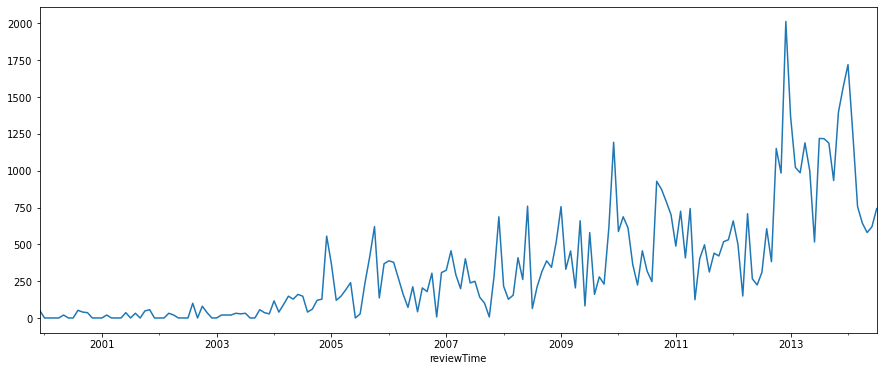

In [132]:
y.plot(figsize=(15,6))
plt.show()

In [133]:
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    
    if(pvalue>0.05):
        msg = 'p-value= {}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value=  {}. Data is stationary'.format(pvalue)
        
    return(msg)

In [134]:
checkStationarity(y)

'p-value= 0.8670423414132339. Data is not stationary'

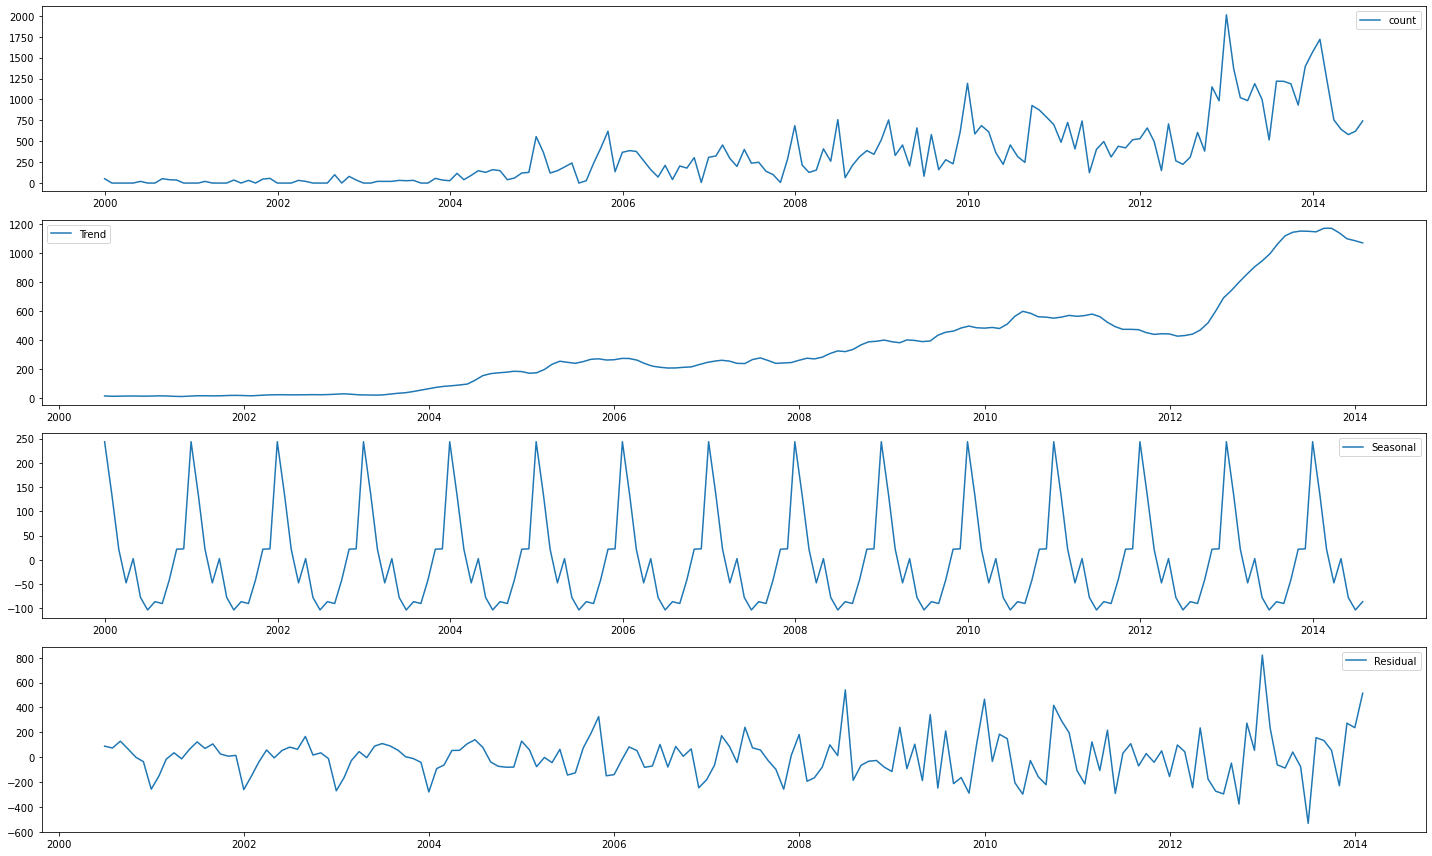

In [135]:
comp=seasonal_decompose(y,period=12)
y_trend=comp.trend
y_seasonal=comp.seasonal
y_residual=comp.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(y,label='count')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(y_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(y_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(y_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

In [136]:
y

reviewTime
1999-12-31     52
2000-01-31      0
2000-02-29      0
2000-03-31      0
2000-04-30      0
             ... 
2014-03-31    756
2014-04-30    644
2014-05-31    580
2014-06-30    619
2014-07-31    743
Freq: M, Name: Frequency, Length: 176, dtype: int64

In [137]:
ratio=0.7
ss1=int(len(y)*ratio)
train=y[:ss1]
test=y[ss1:]

In [138]:
ss1

123

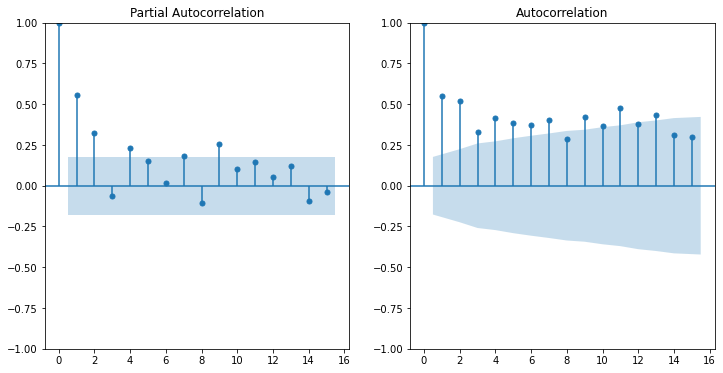

In [139]:
_,ax=plt.subplots(1,2,figsize=(12,6))

plot_pacf(train,lags=15,ax=ax[0]);
plot_acf(train,lags=15,ax=ax[1]);

## SARIMAX with exogenous variables :

In [144]:
dfs= DF[['overall', 'price','Frequency']].resample('M').sum()
dfs

,overall,price,Frequency
reviewTime,,,
1999-12-31,20,240,52
2000-01-31,0,0,0
2000-02-29,0,0,0
2000-03-31,0,0,0
2000-04-30,0,0,0
...,...,...,...
2014-03-31,79,778,756
2014-04-30,78,807,644
2014-05-31,88,383,580


In [145]:
rows=int(0.7*len(dfs))
rows

123

In [146]:
train=dfs.iloc[:rows]
test=dfs.iloc[rows:]
test.head()

,overall,price,Frequency
reviewTime,,,
2010-03-31,66,742,612
2010-04-30,43,484,362
2010-05-31,30,189,224
2010-06-30,57,785,456
2010-07-31,43,292,318


In [147]:
exog_train= train[['overall','price']]
exog_test= test[['overall', 'price']]

exog_train




,overall,price
reviewTime,,
1999-12-31,20,240
2000-01-31,0,0
2000-02-29,0,0
2000-03-31,0,0
2000-04-30,0,0
...,...,...
2009-10-31,26,304
2009-11-30,71,962
2009-12-31,91,1144


In [148]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sari2= SARIMAX(train.Frequency, order=(1,1,1), seasonal_order=(0,0,0,12), exog=exog_train).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.88853D+00    |proj g|=  1.17342D-01

At iterate    5    f=  5.88008D+00    |proj g|=  1.56344D-02

At iterate   10    f=  5.87968D+00    |proj g|=  2.92072D-03

At iterate   15    f=  5.87949D+00    |proj g|=  1.32304D-03

At iterate   20    f=  5.87844D+00    |proj g|=  3.74697D-02

At iterate   25    f=  5.87715D+00    |proj g|=  3.76860D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     31      1     0     0   

 This problem is unconstrained.


In [149]:
model_sari2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Frequency   No. Observations:                  123
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -722.890
Date:                Sun, 11 Dec 2022   AIC                           1455.779
Time:                        14:09:53   BIC                           1469.799
Sample:                    12-31-1999   HQIC                          1461.474
                         - 02-28-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
overall        7.6505      0.836      9.153      0.000       6.012       9.289
price          0.0257      0.066      0.391      0.696      -0.103       0.155
ar.L1         -0.0506      0.124     -0.408      0.683      -0.293       0.192
ma.L1         -0.8012      0.094     -8.558      0.000      -0.985      -0.618
sigma2      8134.6947    734.092     11.081      0.000    6695.902    9573.488
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               256.28
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              11.59   Skew:                             1.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [150]:
fv= model_sari2.fittedvalues
fv

reviewTime
1999-12-31    159.186195
2000-01-31   -106.422189
2000-02-29    -54.962971
2000-03-31    -34.703419
2000-04-30    -24.474679
                 ...    
2009-10-31    189.495882
2009-11-30    556.581775
2009-12-31    724.389258
2010-01-31    415.179058
2010-02-28    675.698012
Freq: M, Length: 123, dtype: float64

In [151]:
fv_test2= model_sari2.forecast(len(test.Frequency), exog=exog_test)
fv_test2

2010-03-31     648.182934
2010-04-30     465.745948
2010-05-31     358.689293
2010-06-30     580.591341
2010-07-31     460.796695
2010-08-31     329.503289
2010-09-30     657.533582
2010-10-31     770.051643
2010-11-30     799.521145
2010-12-31     610.968394
2011-01-31     565.863371
2011-02-28     534.611265
2011-03-31     455.694112
2011-04-30     605.711392
2011-05-31     289.861158
2011-06-30     585.700706
2011-07-31     429.724743
2011-08-31     436.577393
2011-09-30     476.425415
2011-10-31     544.842168
2011-11-30     780.140262
2011-12-31     903.937612
2012-01-31     803.330113
2012-02-29     701.866516
2012-03-31     259.207788
2012-04-30     658.331406
2012-05-31     388.075183
2012-06-30     316.235506
2012-07-31     326.562552
2012-08-31     751.224825
2012-09-30     527.482318
2012-10-31     822.028250
2012-11-30     746.295594
2012-12-31    1530.799662
2013-01-31    1259.745614
2013-02-28     921.105176
2013-03-31     901.132358
2013-04-30    1169.484097
2013-05-31  

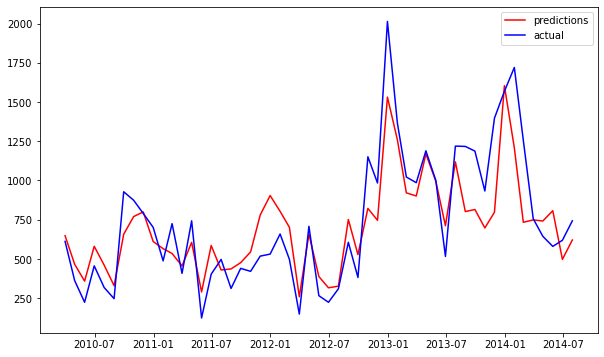

In [152]:
plt.figure(figsize=(10,6))
plt.plot(fv_test2 , 'r',label='predictions')
plt.plot(test.Frequency , 'b',label='actual')
plt.legend()

In [153]:
fcastf = model_sari2.predict(start=len(fv_test2), end=len(fv_test2)+12, typ='levels')
print(fcastf)




reviewTime
2004-05-31    190.672692
2004-06-30     89.804483
2004-07-31     97.338142
2004-08-31     59.025268
2004-09-30    107.217843
2004-10-31     19.703686
2004-11-30    213.776680
2004-12-31    424.018182
2005-01-31    225.812342
2005-02-28    112.205800
2005-03-31    137.404382
2005-04-30    274.056824
2005-05-31    188.518502
Freq: M, Name: predicted_mean, dtype: float64


In [154]:
mse3= mean_squared_error(test.Frequency , fv_test2)
mse3

47249.41053343841

In [155]:
aic3=model_sari2.aic
aic3

1455.7792068138579

In [156]:
bic3=model_sari2.bic
bic3

1469.799312037524

In [157]:
rmse3=mean_squared_error(test.Frequency, fv_test2, squared=False)
rmse3
    

217.36929528670422

In [158]:
fcast3 = model_sari2.predict(start=len(y), end=len(y)+12,exog=exog_train[:66])
print(fcast3)



2014-08-31    332.591642
2014-09-30    237.594650
2014-10-31    237.594650
2014-11-30    188.603451
2014-12-31    237.594650
2015-01-31    158.001553
2015-02-28    339.193731
2015-03-31    557.730709
2015-04-30    343.877732
2015-05-31    203.904400
2015-06-30    222.293701
2015-07-31    357.325670
2015-08-31    283.497497
Freq: M, Name: predicted_mean, dtype: float64


Text(0.5, 1.0, 'Actual  / Predicted / Future')

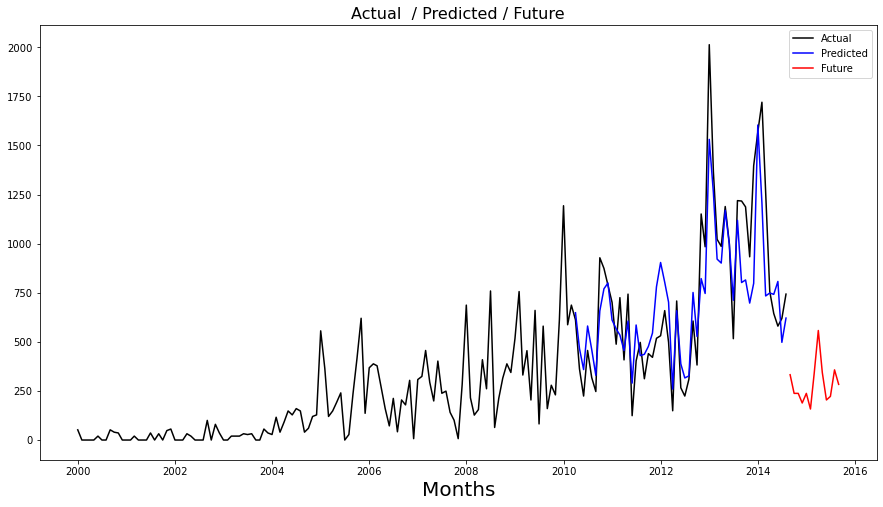

In [159]:
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(y, color = 'black',label='Actual')  #plot actual data
    ax.plot(fv_test2, color='blue', label='Predicted')          #plot predicted forecast data
    ax.plot(fcast3,color='red', label='Future')            #plot future forecast data
    plt.xlabel('Months',fontsize=20)
    leg = ax.legend(fontsize=10)
    plt.title('Actual  / Predicted / Future',fontsize=16)
    